In [120]:
import umap

import pandas as pd

from sklearn.manifold import TSNE


In [121]:
data = pd.read_csv("./data/DataModel.csv", sep=",")

In [122]:
data

Year Category  Region      Dist_EQ  PCT_CHARTER  PCT_NETWORK  \
0    2002      NBI   AFRMY  1016.778341     0.059713     0.622493   
1    2002      NBI    AMCS  1048.401762     0.000000     0.600042   
2    2002      NBI     AMN  1409.858140     0.017363     0.590396   
3    2002      NBI  ASIAUS   731.613261     0.000000     0.469682   
4    2002      NBI     CEI  2021.616697     0.101249     0.335923   
..    ...      ...     ...          ...          ...          ...   
547  2024      NBS  ASIAUS   812.959679     0.005828     0.090262   
548  2024      NBS     CEI  1639.145589     0.123707     0.000000   
549  2024      NBS     CHN  1167.965411     0.000000     0.499884   
550  2024      NBS     EUR   931.780060     0.033287     0.389731   
551  2024      NBS     SIN  1120.546179     0.020522     0.540683   

     PCT_REGIONAL   PCT_LCC  
0        0.267125  0.050669  
1        0.377531  0.022427  
2        0.173806  0.218435  
3        0.466558  0.063759  
4        0.353537  0.209291  
..            ...       ...  
547      0.756055  0.147855  
548      0.861040  0.015253  
549      0.446786  0.053330  
550      0.127346  0.449636  
551      0.438795  0.000000  

[552 rows x 8 columns]

In [123]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Prepare data - select all numerical features
numerical_features = [
    "Dist_EQ",
    "PCT_CHARTER",
    "PCT_NETWORK",
    "PCT_REGIONAL",
    "PCT_LCC",
    "Year",
]
X = data[numerical_features].to_numpy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode Category for shape
le_cat = LabelEncoder()
category_encoded = le_cat.fit_transform(data["Category"])

# Encode Region for coloring
le_reg = LabelEncoder()
region_encoded = le_reg.fit_transform(data["Region"])

Computing t-SNE...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 552 samples in 0.001s...
[t-SNE] Computed neighbors for 552 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 552 / 552
[t-SNE] Mean sigma: 0.767389
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.456131
[t-SNE] KL divergence after 1500 iterations: 0.482304


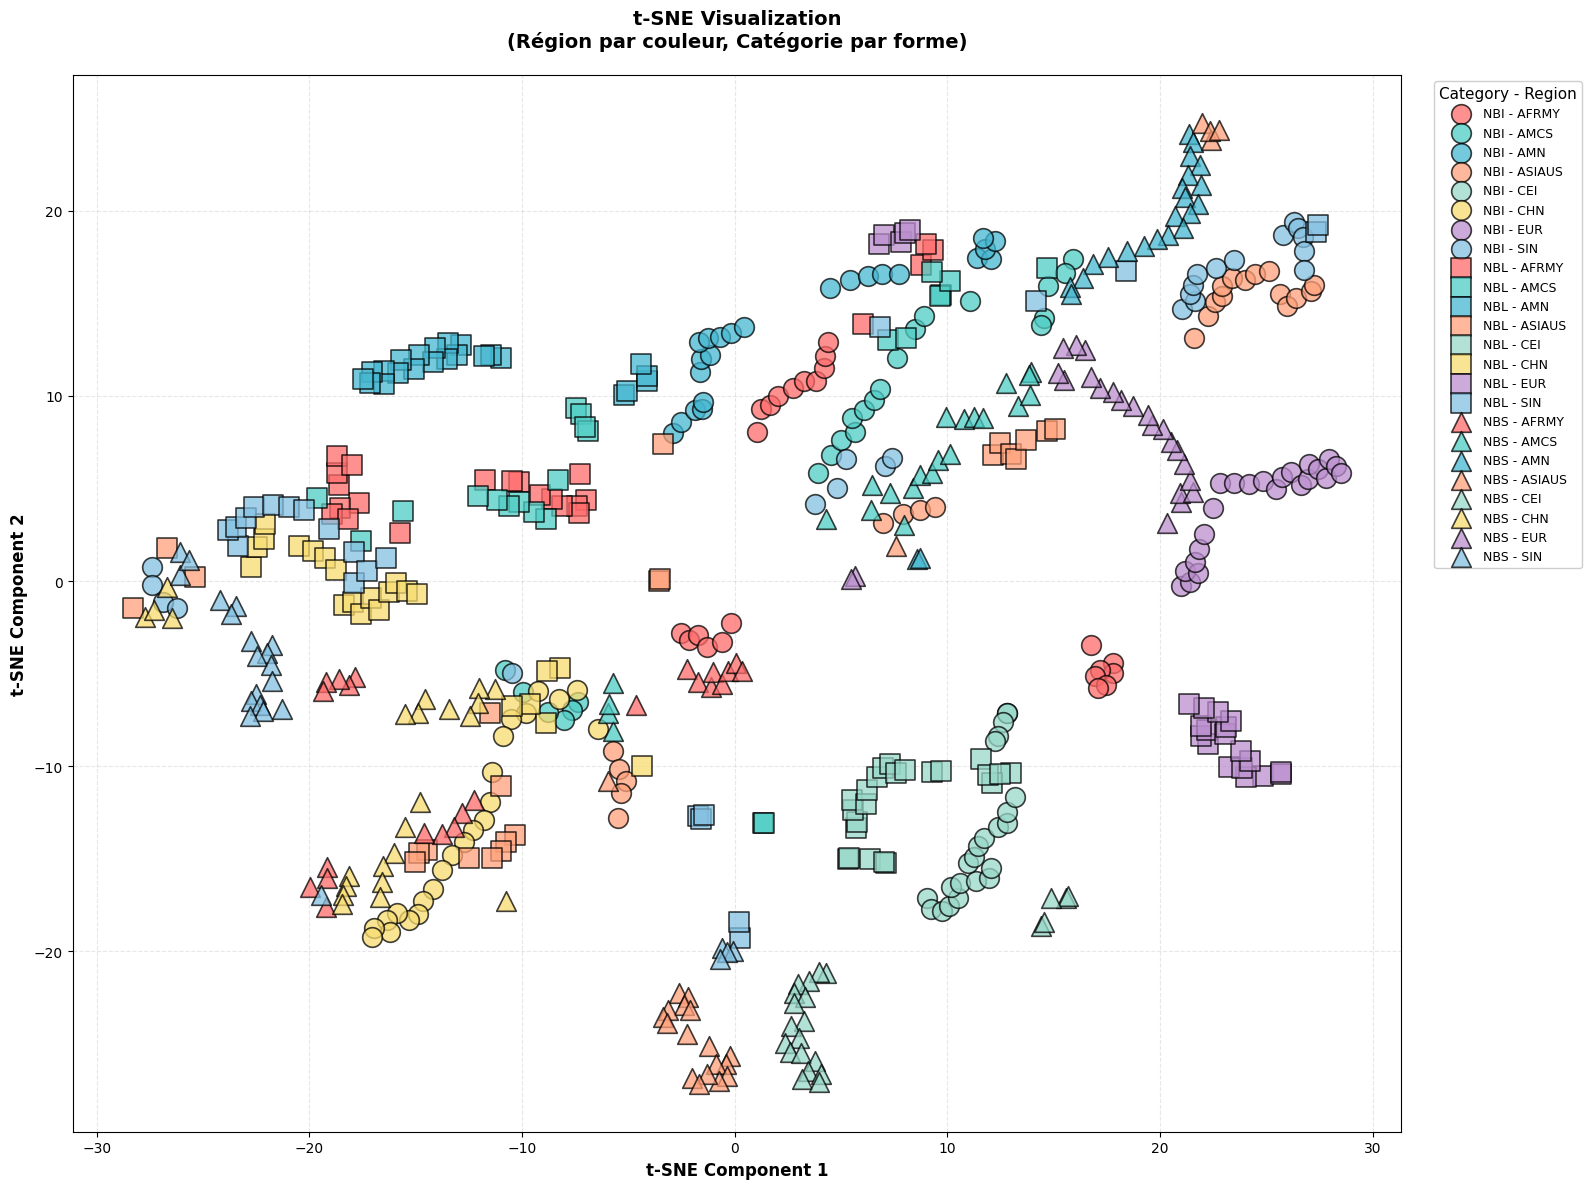


Categories: ['NBI' 'NBL' 'NBS']
Regions: ['AFRMY' 'AMCS' 'AMN' 'ASIAUS' 'CEI' 'CHN' 'EUR' 'SIN']
Markers: Circle=Circle (NBI), Square=Square (NBL), Triangle=Triangle (NBS)
Data points: 552


In [124]:
# t-SNE visualization with optimized parameters
print("Computing t-SNE...")
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    max_iter=1500,
    learning_rate=200,
    verbose=1,
)
X_tsne = tsne.fit_transform(X_scaled)

# Create improved plot with better visuals
fig, ax = plt.subplots(figsize=(16, 12))

# Use a better color palette for regions
region_colors = {
    0: "#FF6B6B",  # AFRMY - red
    1: "#4ECDC4",  # AMCS - teal
    2: "#45B7D1",  # AMN - blue
    3: "#FFA07A",  # ASIAUS - light salmon
    4: "#98D8C8",  # CEI - mint
    5: "#F7DC6F",  # CHN - yellow
    6: "#BB8FCE",  # EUR - purple
    7: "#85C1E2",  # SIN - light blue
}

# Define larger, clearer markers for each category
markers = {0: "o", 1: "s", 2: "^"}
marker_names = {0: "Circle (NBI)", 1: "Square (NBL)", 2: "Triangle (NBS)"}

# Plot each combination of category and region with enhanced styling
handles = []
labels_legend = []

for cat in sorted(np.unique(category_encoded)):
    for reg in sorted(np.unique(region_encoded)):
        mask = (category_encoded == cat) & (region_encoded == reg)
        if np.any(mask):
            scatter = ax.scatter(
                X_tsne[mask, 0],
                X_tsne[mask, 1],
                c=region_colors[reg],
                marker=markers[cat],
                s=200,
                alpha=0.75,
                edgecolors="black",
                linewidth=1.2,
                label=f"{le_cat.classes_[cat]} - {le_reg.classes_[reg]}",
            )

# Create custom legend with two columns
ax.legend(
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=9,
    title="Category - Region",
    title_fontsize=11,
    ncol=1,
    framealpha=0.95,
)

ax.set_xlabel("t-SNE Component 1", fontsize=12, fontweight="bold")
ax.set_ylabel("t-SNE Component 2", fontsize=12, fontweight="bold")
ax.set_title(
    "t-SNE Visualization\n(Région par couleur, Catégorie par forme)",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
ax.grid(visible=True, alpha=0.3, linestyle="--")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

print(f"\nCategories: {le_cat.classes_}")
print(f"Regions: {le_reg.classes_}")
print(
    f"Markers: Circle={marker_names[0]}, Square={marker_names[1]}, Triangle={marker_names[2]}",
)
print(f"Data points: {len(X_tsne)}")

Computing UMAP...


/Users/arthurdanjou/Workspace/studies/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


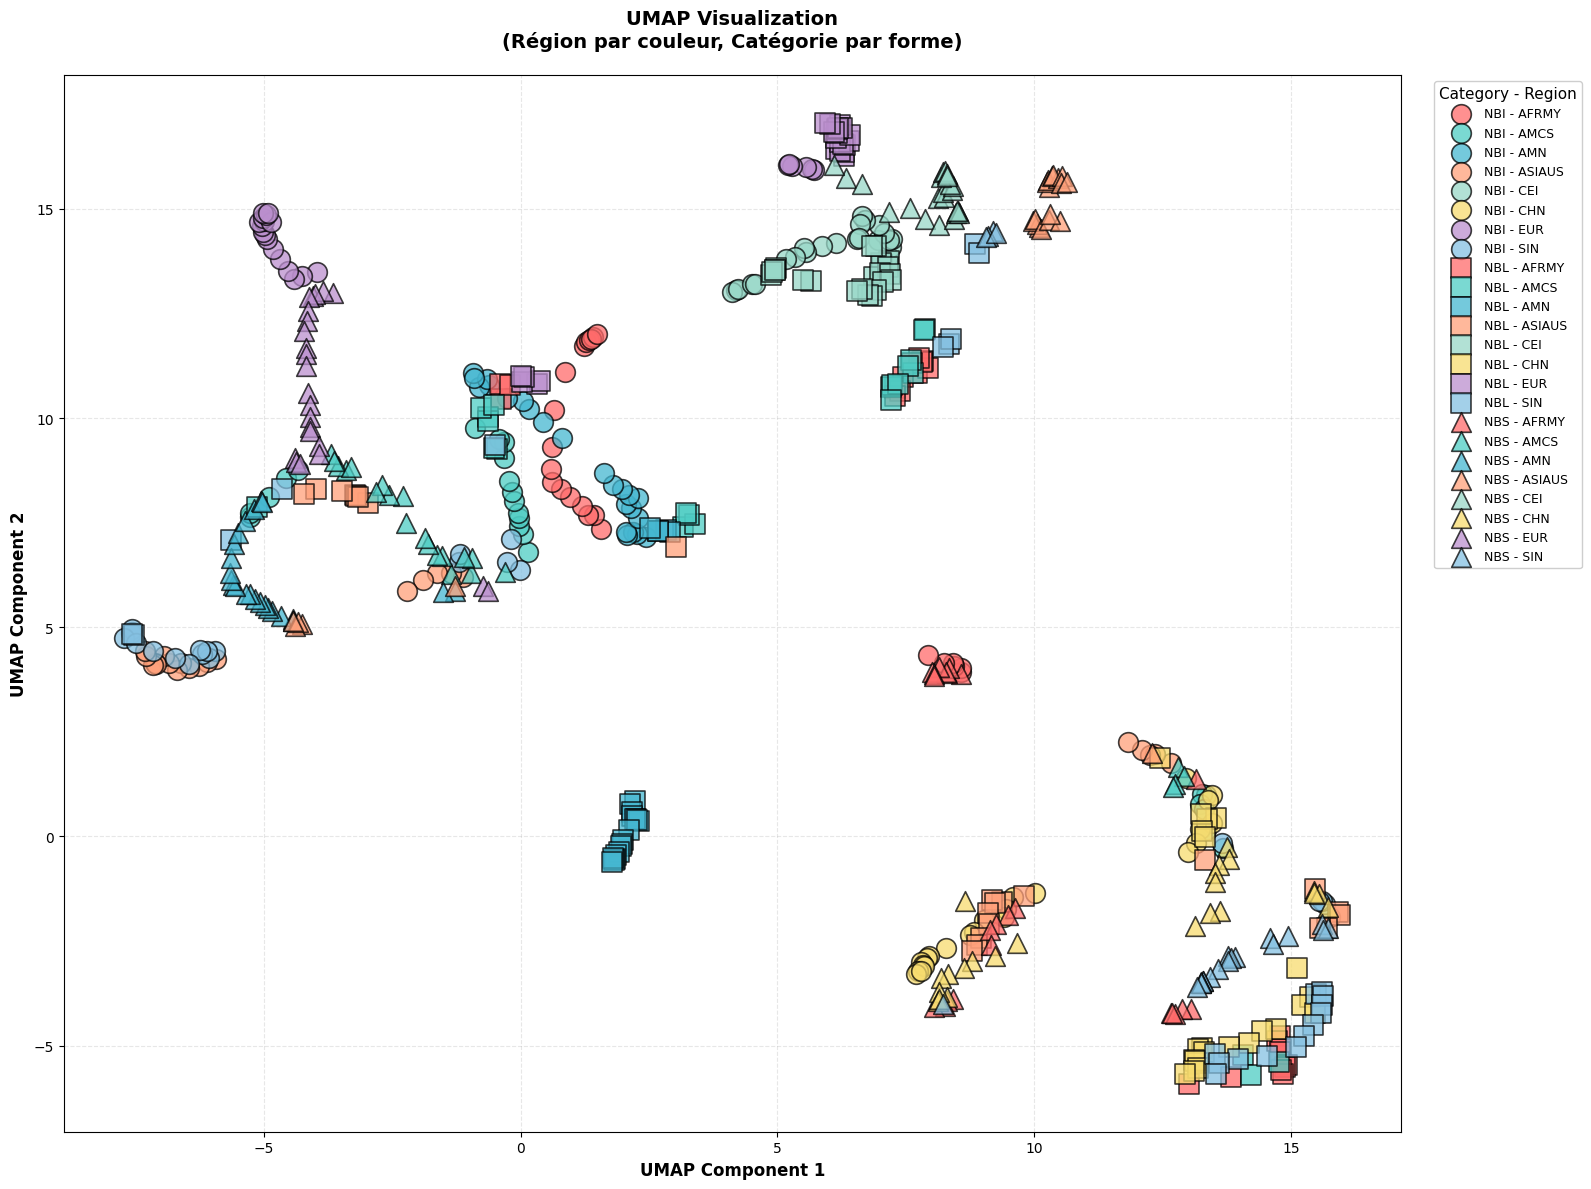


Categories: ['NBI' 'NBL' 'NBS']
Regions: ['AFRMY' 'AMCS' 'AMN' 'ASIAUS' 'CEI' 'CHN' 'EUR' 'SIN']
Markers: Circle=Circle (NBI), Square=Square (NBL), Triangle=Triangle (NBS)
Data points: 552


In [125]:
# UMAP visualization with optimized parameters
print("Computing UMAP...")
umap_reducer = umap.UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=20,
    min_dist=0.05,
    metric="euclidean",
    spread=2.0,
)
X_umap = umap_reducer.fit_transform(X_scaled)

# Create improved plot with better visuals
fig, ax = plt.subplots(figsize=(16, 12))

# Use a better color palette for regions (same as t-SNE for consistency)
region_colors = {
    0: "#FF6B6B",  # AFRMY - red
    1: "#4ECDC4",  # AMCS - teal
    2: "#45B7D1",  # AMN - blue
    3: "#FFA07A",  # ASIAUS - light salmon
    4: "#98D8C8",  # CEI - mint
    5: "#F7DC6F",  # CHN - yellow
    6: "#BB8FCE",  # EUR - purple
    7: "#85C1E2",  # SIN - light blue
}

# Define larger, clearer markers for each category
markers = {0: "o", 1: "s", 2: "^"}
marker_names = {0: "Circle (NBI)", 1: "Square (NBL)", 2: "Triangle (NBS)"}

# Plot each combination of category and region with enhanced styling
for cat in sorted(np.unique(category_encoded)):
    for reg in sorted(np.unique(region_encoded)):
        mask = (category_encoded == cat) & (region_encoded == reg)
        if np.any(mask):
            ax.scatter(
                X_umap[mask, 0],
                X_umap[mask, 1],
                c=region_colors[reg],
                marker=markers[cat],
                s=200,
                alpha=0.75,
                edgecolors="black",
                linewidth=1.2,
                label=f"{le_cat.classes_[cat]} - {le_reg.classes_[reg]}",
            )

# Create custom legend
ax.legend(
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=9,
    title="Category - Region",
    title_fontsize=11,
    ncol=1,
    framealpha=0.95,
)

ax.set_xlabel("UMAP Component 1", fontsize=12, fontweight="bold")
ax.set_ylabel("UMAP Component 2", fontsize=12, fontweight="bold")
ax.set_title(
    "UMAP Visualization\n(Région par couleur, Catégorie par forme)",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
ax.grid(visible=True, alpha=0.3, linestyle="--")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

print(f"\nCategories: {le_cat.classes_}")
print(f"Regions: {le_reg.classes_}")
print(
    f"Markers: Circle={marker_names[0]}, Square={marker_names[1]}, Triangle={marker_names[2]}",
)
print(f"Data points: {len(X_umap)}")

Computing t-SNE with n_components=2...
Computing t-SNE with n_components=3...


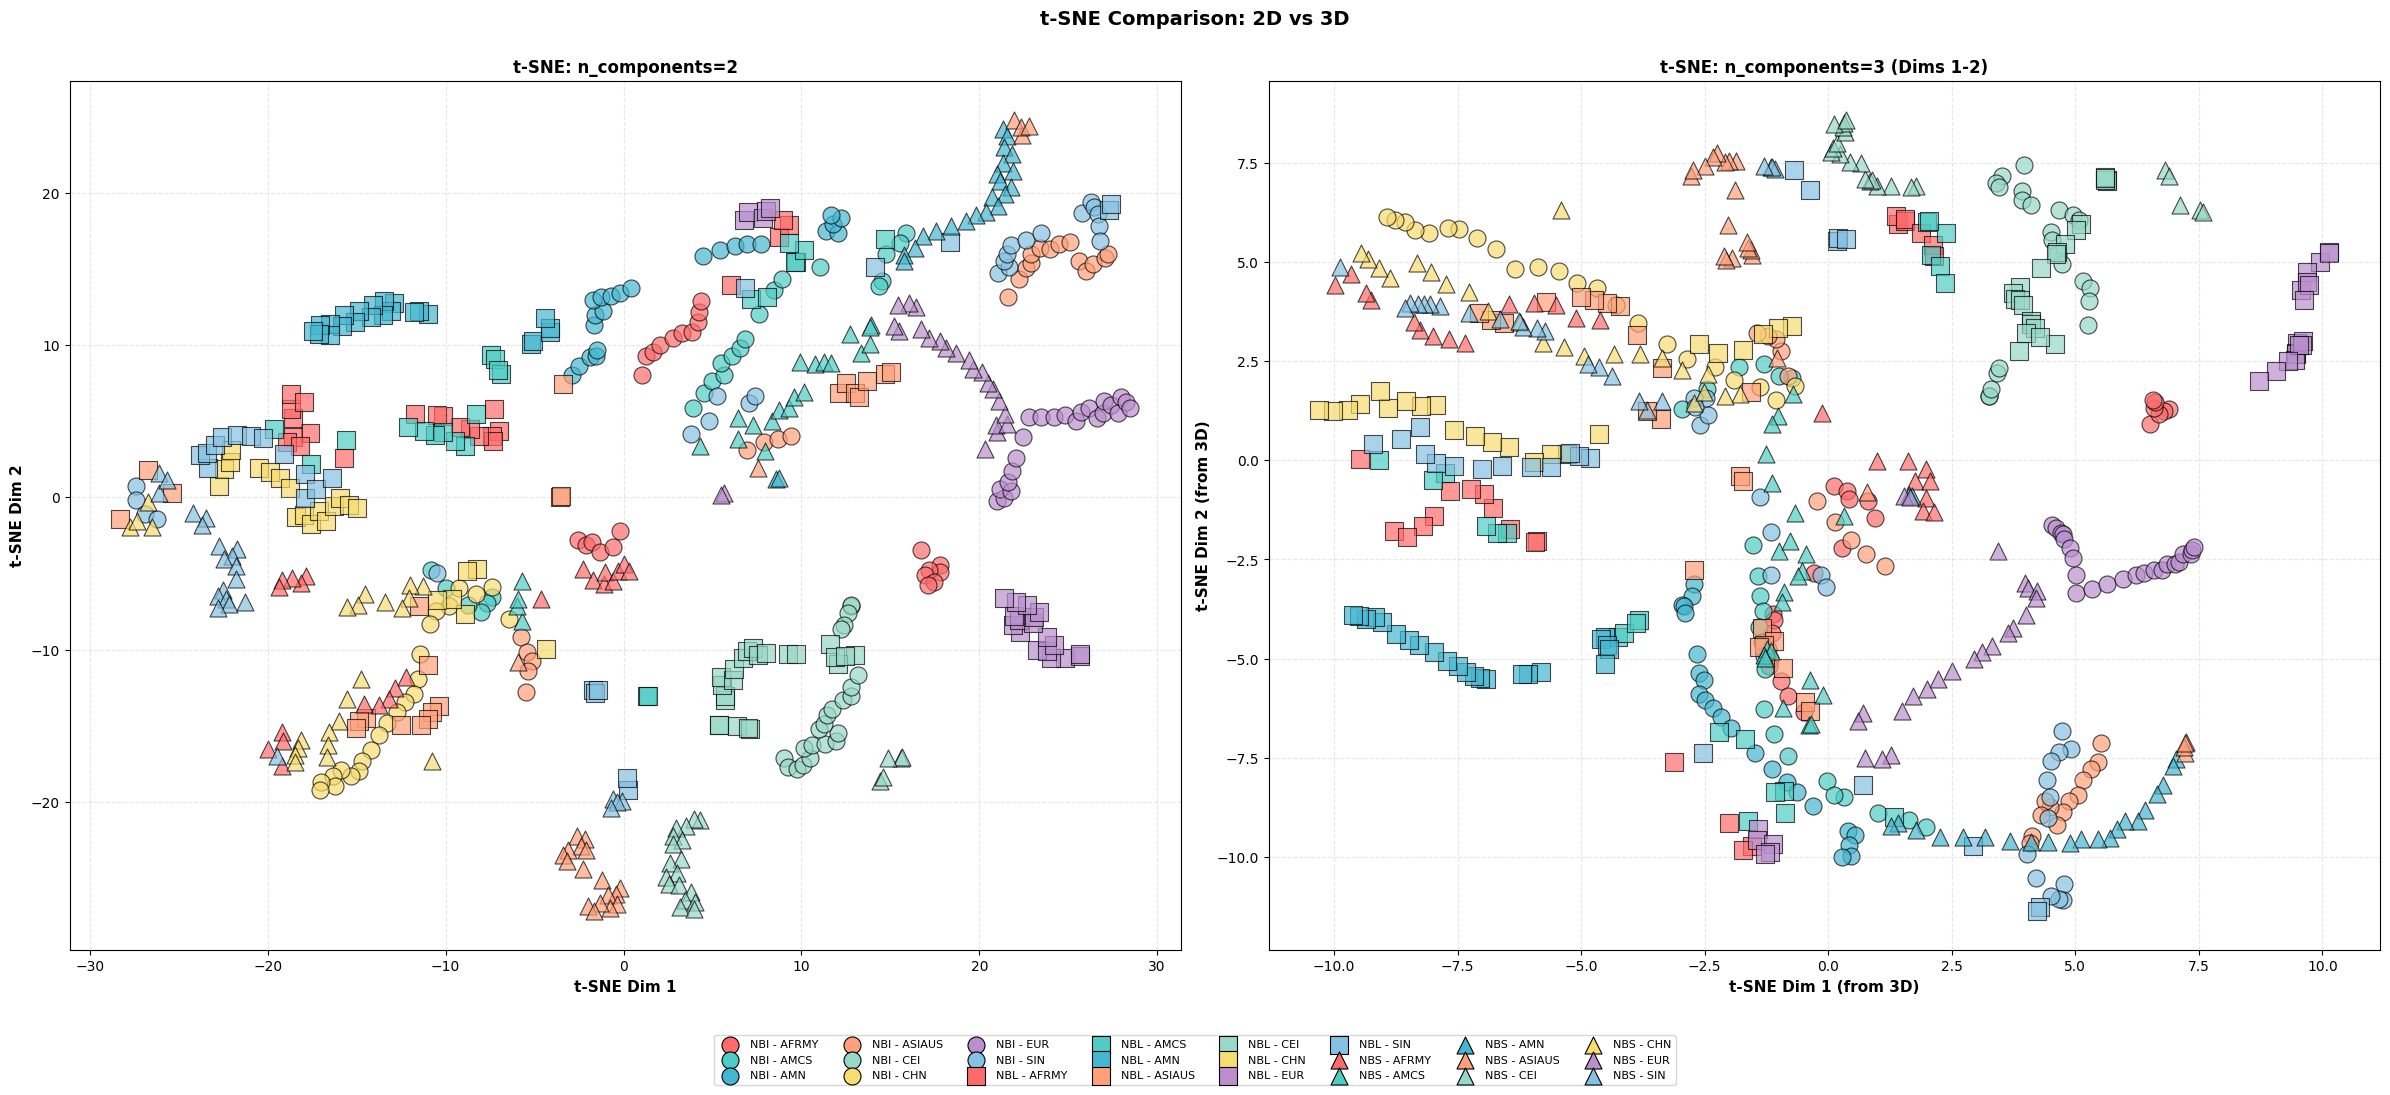


✓ t-SNE 2D: Conserve l'information principale sur 2 dimensions
✓ t-SNE 3D: Ajoute une 3e dimension pour plus de détails


In [126]:
# Comparison: t-SNE with different n_components (2D vs 3D)
print("Computing t-SNE with n_components=2...")
tsne_2d = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    max_iter=1500,
    learning_rate=200,
    verbose=0,
)
X_tsne_2d = tsne_2d.fit_transform(X_scaled)

print("Computing t-SNE with n_components=3...")
tsne_3d = TSNE(
    n_components=3,
    random_state=42,
    perplexity=30,
    max_iter=1500,
    learning_rate=200,
    verbose=0,
)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

# Color and marker definitions
region_colors = {
    0: "#FF6B6B",
    1: "#4ECDC4",
    2: "#45B7D1",
    3: "#FFA07A",
    4: "#98D8C8",
    5: "#F7DC6F",
    6: "#BB8FCE",
    7: "#85C1E2",
}
markers = {0: "o", 1: "s", 2: "^"}

# 2D t-SNE plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# 2D scatter
for cat in sorted(np.unique(category_encoded)):
    for reg in sorted(np.unique(region_encoded)):
        mask = (category_encoded == cat) & (region_encoded == reg)
        if np.any(mask):
            ax1.scatter(
                X_tsne_2d[mask, 0],
                X_tsne_2d[mask, 1],
                c=region_colors[reg],
                marker=markers[cat],
                s=150,
                alpha=0.7,
                edgecolors="black",
                linewidth=0.8,
            )

ax1.set_xlabel("t-SNE Dim 1", fontsize=11, fontweight="bold")
ax1.set_ylabel("t-SNE Dim 2", fontsize=11, fontweight="bold")
ax1.set_title("t-SNE: n_components=2", fontsize=12, fontweight="bold")
ax1.grid(visible=True, alpha=0.3, linestyle="--")

# 3D t-SNE plot (projected to 2D showing first 2 dims)
for cat in sorted(np.unique(category_encoded)):
    for reg in sorted(np.unique(region_encoded)):
        mask = (category_encoded == cat) & (region_encoded == reg)
        if np.any(mask):
            ax2.scatter(
                X_tsne_3d[mask, 0],
                X_tsne_3d[mask, 1],
                c=region_colors[reg],
                marker=markers[cat],
                s=150,
                alpha=0.7,
                edgecolors="black",
                linewidth=0.8,
                label=f"{le_cat.classes_[cat]} - {le_reg.classes_[reg]}" if cat == 0 and reg == 0 else "",
            )

ax2.set_xlabel("t-SNE Dim 1 (from 3D)", fontsize=11, fontweight="bold")
ax2.set_ylabel("t-SNE Dim 2 (from 3D)", fontsize=11, fontweight="bold")
ax2.set_title("t-SNE: n_components=3 (Dims 1-2)", fontsize=12, fontweight="bold")
ax2.grid(visible=True, alpha=0.3, linestyle="--")

# Add legend
handles = []
for cat in sorted(np.unique(category_encoded)):
    for reg in sorted(np.unique(region_encoded)):
        mask = (category_encoded == cat) & (region_encoded == reg)
        if np.any(mask):
            handles.append(
                plt.scatter([], [], c=region_colors[reg], marker=markers[cat], s=150,
                           edgecolors="black", linewidth=0.8),
            )

fig.legend(
    handles,
    [f"{le_cat.classes_[cat]} - {le_reg.classes_[reg]}"
     for cat in sorted(np.unique(category_encoded))
     for reg in sorted(np.unique(region_encoded))],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.02),
    ncol=8,
    fontsize=8,
)

plt.suptitle("t-SNE Comparison: 2D vs 3D", fontsize=14, fontweight="bold", y=1.00)
plt.tight_layout()
plt.show()

print("\n✓ t-SNE 2D: Conserve l'information principale sur 2 dimensions")
print("✓ t-SNE 3D: Ajoute une 3e dimension pour plus de détails")


Computing UMAP with n_components=2...


/Users/arthurdanjou/Workspace/studies/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Computing UMAP with n_components=3...


/Users/arthurdanjou/Workspace/studies/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


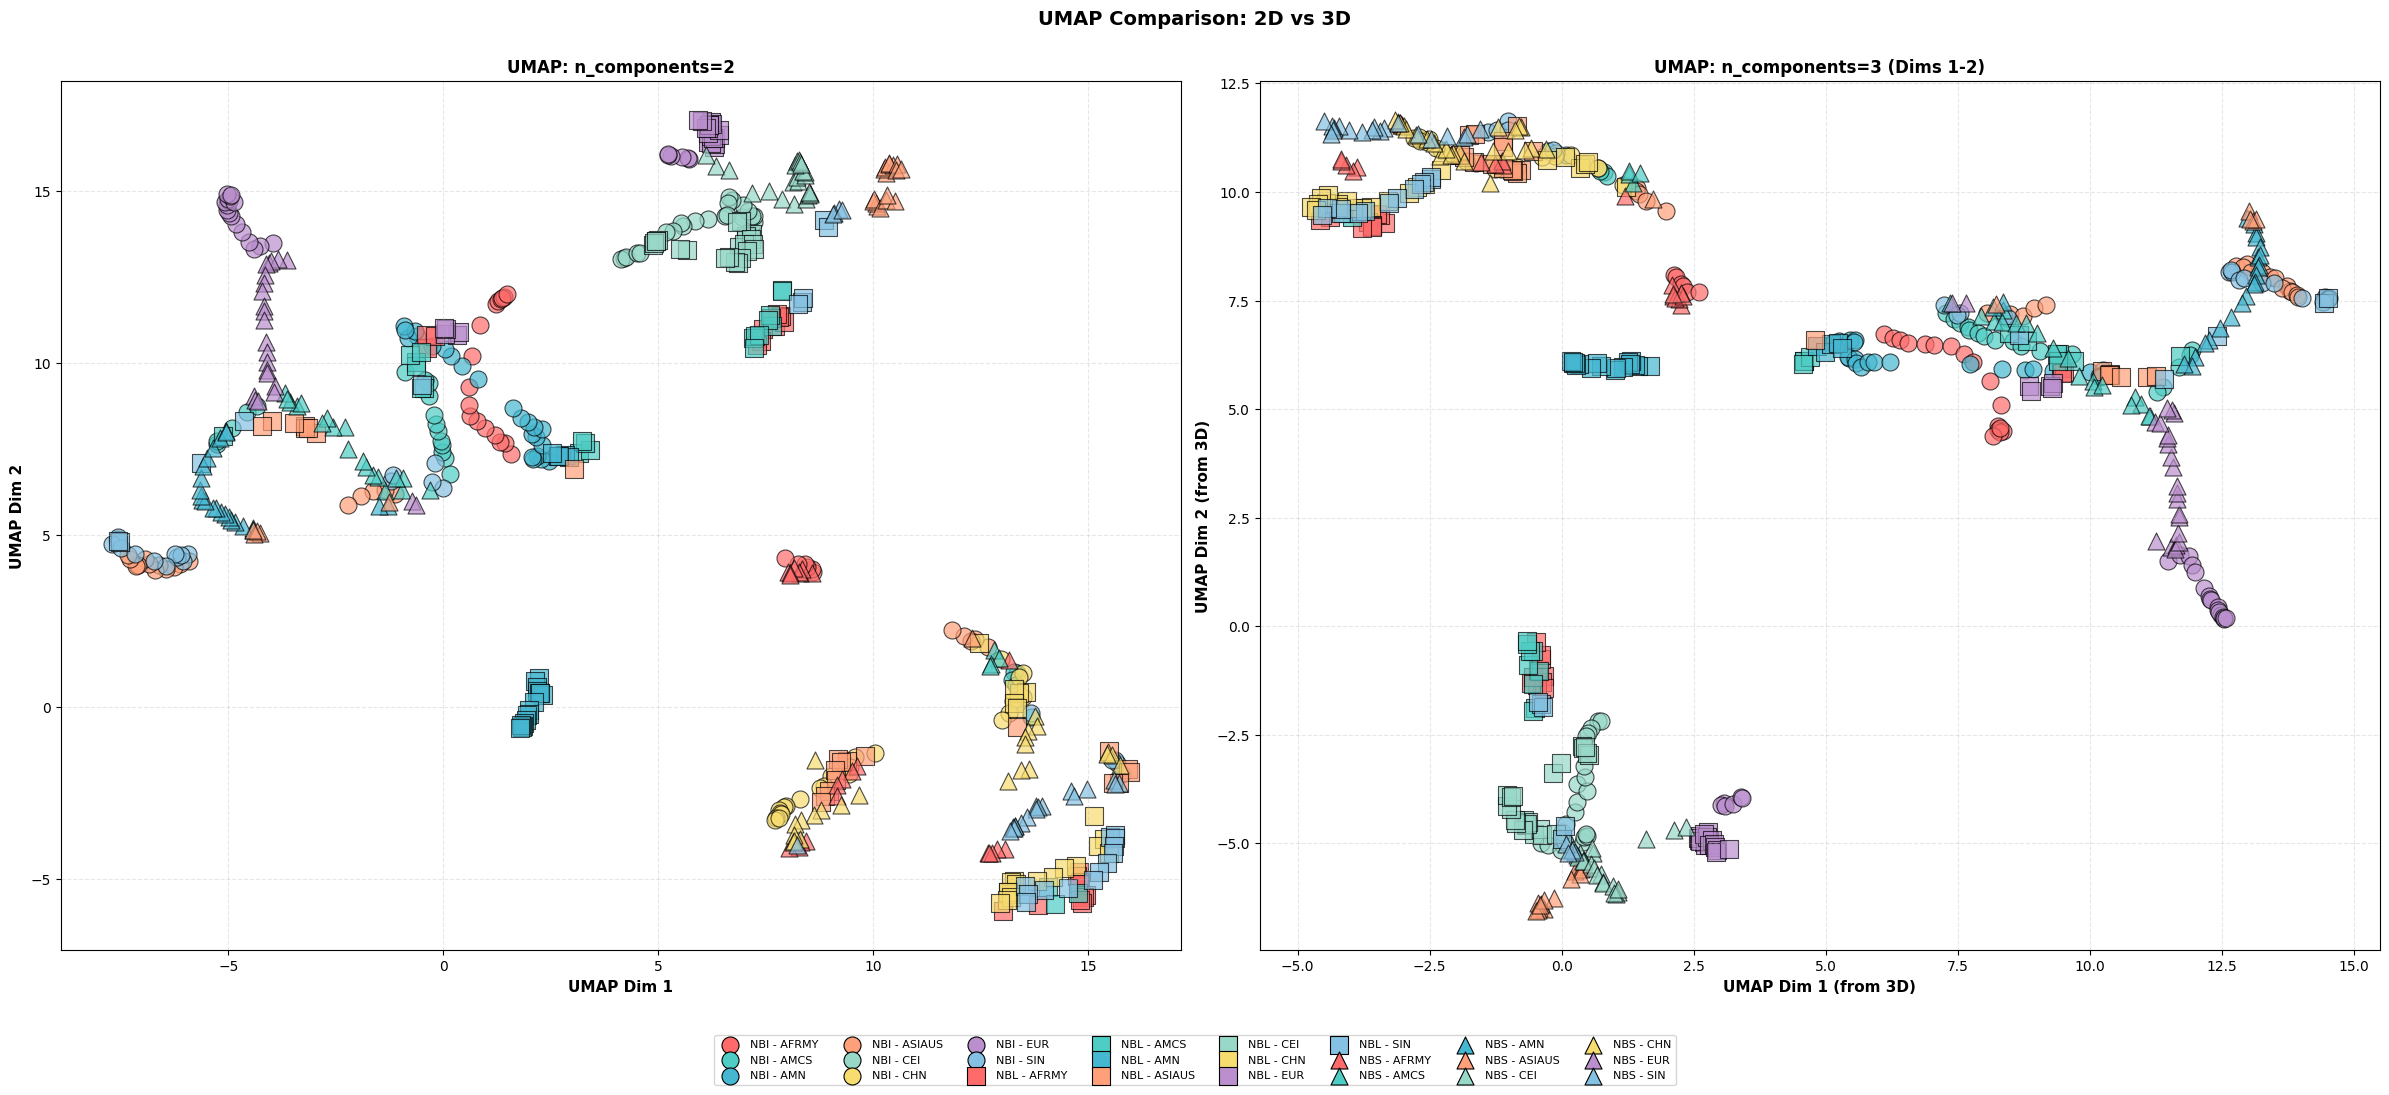


✓ UMAP 2D: Conserve l'information principale sur 2 dimensions
✓ UMAP 3D: Ajoute une 3e dimension pour plus de détails


In [127]:
# Comparison: UMAP with different n_components (2D vs 3D)
print("Computing UMAP with n_components=2...")
umap_2d = umap.UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=20,
    min_dist=0.05,
    metric="euclidean",
    spread=2.0,
)
X_umap_2d = umap_2d.fit_transform(X_scaled)

print("Computing UMAP with n_components=3...")
umap_3d = umap.UMAP(
    n_components=3,
    random_state=42,
    n_neighbors=20,
    min_dist=0.05,
    metric="euclidean",
    spread=2.0,
)
X_umap_3d = umap_3d.fit_transform(X_scaled)

# 2D UMAP plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# 2D scatter
for cat in sorted(np.unique(category_encoded)):
    for reg in sorted(np.unique(region_encoded)):
        mask = (category_encoded == cat) & (region_encoded == reg)
        if np.any(mask):
            ax1.scatter(
                X_umap_2d[mask, 0],
                X_umap_2d[mask, 1],
                c=region_colors[reg],
                marker=markers[cat],
                s=150,
                alpha=0.7,
                edgecolors="black",
                linewidth=0.8,
            )

ax1.set_xlabel("UMAP Dim 1", fontsize=11, fontweight="bold")
ax1.set_ylabel("UMAP Dim 2", fontsize=11, fontweight="bold")
ax1.set_title("UMAP: n_components=2", fontsize=12, fontweight="bold")
ax1.grid(visible=True, alpha=0.3, linestyle="--")

# 3D UMAP plot (projected to 2D showing first 2 dims)
for cat in sorted(np.unique(category_encoded)):
    for reg in sorted(np.unique(region_encoded)):
        mask = (category_encoded == cat) & (region_encoded == reg)
        if np.any(mask):
            ax2.scatter(
                X_umap_3d[mask, 0],
                X_umap_3d[mask, 1],
                c=region_colors[reg],
                marker=markers[cat],
                s=150,
                alpha=0.7,
                edgecolors="black",
                linewidth=0.8,
            )

ax2.set_xlabel("UMAP Dim 1 (from 3D)", fontsize=11, fontweight="bold")
ax2.set_ylabel("UMAP Dim 2 (from 3D)", fontsize=11, fontweight="bold")
ax2.set_title("UMAP: n_components=3 (Dims 1-2)", fontsize=12, fontweight="bold")
ax2.grid(visible=True, alpha=0.3, linestyle="--")

# Add legend
handles = []
for cat in sorted(np.unique(category_encoded)):
    for reg in sorted(np.unique(region_encoded)):
        mask = (category_encoded == cat) & (region_encoded == reg)
        if np.any(mask):
            handles.append(
                plt.scatter([], [], c=region_colors[reg], marker=markers[cat], s=150,
                           edgecolors="black", linewidth=0.8),
            )

fig.legend(
    handles,
    [f"{le_cat.classes_[cat]} - {le_reg.classes_[reg]}"
     for cat in sorted(np.unique(category_encoded))
     for reg in sorted(np.unique(region_encoded))],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.02),
    ncol=8,
    fontsize=8,
)

plt.suptitle("UMAP Comparison: 2D vs 3D", fontsize=14, fontweight="bold", y=1.00)
plt.tight_layout()
plt.show()

print("\n✓ UMAP 2D: Conserve l'information principale sur 2 dimensions")
print("✓ UMAP 3D: Ajoute une 3e dimension pour plus de détails")


In [128]:
# Summary comparison analysis
print("=" * 80)
print("ANALYSE COMPARATIVE: n_components = 2 vs 3")
print("=" * 80)

# Calculate variance/spread for each
from sklearn.metrics import pairwise_distances


def calculate_separation_quality(X: np.ndarray) -> float:
    """Calculate average distance between points (separation quality)."""
    distances = pairwise_distances(X)
    return distances[np.triu_indices_from(distances, k=1)].mean()

separation_tsne_2d = calculate_separation_quality(X_tsne_2d)
separation_tsne_3d = calculate_separation_quality(X_tsne_3d[:, :2])
separation_umap_2d = calculate_separation_quality(X_umap_2d)
separation_umap_3d = calculate_separation_quality(X_umap_3d[:, :2])

print("\n📊 SÉPARATION DES POINTS (distance moyenne):")
print(f"   t-SNE 2D:  {separation_tsne_2d:.4f}")
print(f"   t-SNE 3D:  {separation_tsne_3d:.4f}")
print(f"   UMAP 2D:   {separation_umap_2d:.4f}")
print(f"   UMAP 3D:   {separation_umap_3d:.4f}")


ANALYSE COMPARATIVE: n_components = 2 vs 3

📊 SÉPARATION DES POINTS (distance moyenne):
   t-SNE 2D:  25.2150
   t-SNE 3D:  9.2383
   UMAP 2D:   12.0624
   UMAP 3D:   10.1399
